<h1> Create LFR benchmarks as for first attempt to creating synthetic data</h1>
<p>As can be seen, LFR graphs also look appealing. We might use them with our original synthethic data as well </p>

In [1]:
from networkx.generators.community import LFR_benchmark_graph
import networkx as nx
from matplotlib import pyplot as plt
import community


# def genrate_lfr_graph(size=250):
#     params = {"n":size, "tau1":2, "tau2":1.1, "mu":0.1, "min_degree":20, "max_degree":50}

#     G = LFR_benchmark_graph(params["n"], params["tau1"], params["tau2"], params["mu"], 
#                         min_degree=params["min_degree"],
#                         max_degree=params["max_degree"],
#                         max_iters=5000, seed = 10,
#                         )
#     print("Generation Completed")
    

#     part = community.best_partition(G)
#     values = [part.get(node) for node in G.nodes()]

#     print("best")
#     plt.figure(1)
#     nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
#     plt.show()

#     return G  


# sizes = [250, 500, 600]
# for n in sizes:
#     G = genrate_lfr_graph(size=n)
#     print(len(G.nodes))

<h1>Create uniform centroid vectors of arbitrary dimension</h1>
<p>These vectors are spreaded uniformly into the circle, the cosine similarity of each consecutive pair is constant </p>

In [2]:
ATTRIBUTE_DIMENSION = 20

#Create separate centroid for clusters
import math
import numpy as np
seed = 43
np.random.seed(seed)


def create_centroid(num_vectors, dimension, challenging = False):
    # Calculate the angle increment between each vector
    angle_increment = 2 * math.pi / num_vectors

    # Initialize a list to store the vectors
    centroids = []

    if challenging == False:  
        # Generate the unit vectors
        for i in range(num_vectors):
            # Calculate the angle for this vector
            angle = i * angle_increment

            # Create the unit vector in 2D space
            unit_vector_2d = np.array([math.cos(angle), math.sin(angle)])

            # Create the 20-dimensional unit vector by repeating the 2D vector
            unit_vector_nd = np.tile(unit_vector_2d, dimension // 2)/(np.sqrt(dimension/2))
            # Append the unit vector to the list
            centroids.append(np.expand_dims(unit_vector_nd, axis =0))
            
    
    else:
        for i in range(num_vectors):
            # Calculate the angle for this vector
            if i == (num_vectors-1):
                angle = (i-1) * angle_increment + angle_increment/(3*num_vectors)
            
            else:
                angle = i * angle_increment

            # Create the unit vector in 2D space
            unit_vector_2d = np.array([math.cos(angle), math.sin(angle)])

            # Create the 20-dimensional unit vector by repeating the 2D vector
            unit_vector_nd = np.tile(unit_vector_2d, dimension // 2)/(np.sqrt(dimension/2))
            # Append the unit vector to the list
            centroids.append(np.expand_dims(unit_vector_nd, axis =0))
    
    return centroids


fc = create_centroid(6, ATTRIBUTE_DIMENSION, False)
centroids_dict = {0: fc[0], 1: fc[1], 2: fc[2], 3: fc[3], 4: fc[4], 5:fc[4], 6:fc[4], 7:fc[5], 8:fc[5], 9:fc[5]}
#centroids_dict = {0: fc[0], 1: fc[1], 2: fc[2], 3: fc[3], 4: fc[4], 5:fc[5]}

<h1>Create semi-cliques</h1>
<p>Each semi-clique is a seperate component with a predefined edge density</p>

In [3]:
import itertools
import random
import networkx as nx
import matplotlib.pyplot as plt
random.seed(seed)

def generate_pairs_with_probability(n, ratio):
    nodes = list(range(n))
    all_pairs = list(itertools.combinations(nodes, 2))
    random.shuffle(all_pairs)
    num_pairs_to_choose = int(len(all_pairs)*ratio)
    selected_pairs = all_pairs[:num_pairs_to_choose]

    return selected_pairs

def create_semi_clique(size, ratio):
    component = nx.empty_graph(size)
    edges = generate_pairs_with_probability(size, ratio)
    #print(f'added {len(edges)} in cluster edges')
    component.add_edges_from(edges)
#     nx.draw(component, with_labels = True)
    return component

In [4]:
def show_graph(G):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=seed)  # Define layout for visualization
    nx.draw(G, pos, node_size=10, node_color='b', with_labels=False)
    plt.show()

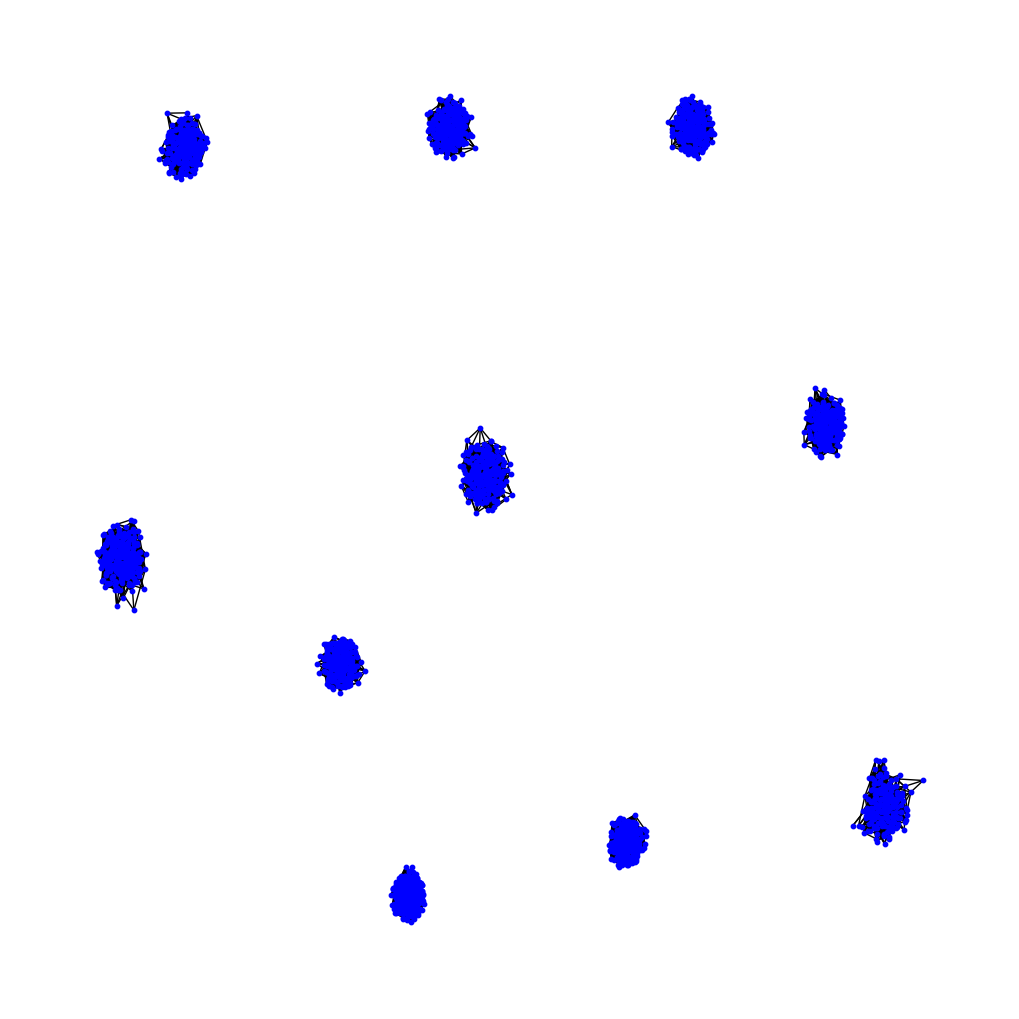

2001 15286
5


In [5]:
import string
import pickle

capital_letters = list(string.ascii_uppercase) #[A, B, ...,Y, Z] used for node naming inside a cluster

def create_seperated_component(number_of_components, six_clusters = False, show=False):
    cluster_sizes = []
    
    G = nx.Graph()
    for i in range(number_of_components):
        component_size = np.random.randint(low=150, high=250)

        edge_density = np.random.uniform(low=0.05, high=0.1)     
        component = create_semi_clique(component_size, edge_density)
        
        cluster_sizes.append(component_size)
        #print(f'component size {component_size}')
        
        new_labels = {node: f'{capital_letters[i]+ str(node)}' for node in component.nodes}
        nx.relabel_nodes(component, new_labels, copy=False)
        
        if i == 0:
            G = component
 
            
        else:
            G = nx.union(G, component)
        
    if show:    
         show_graph(G)
            
    ground_truth = []
    
    if six_clusters == False:
        for idx, size in enumerate(cluster_sizes):
            for i in range(size):
                ground_truth.append(idx)
                
    else:
        for idx, size in enumerate(cluster_sizes):
            for i in range(size):
                if idx < 4:
                    ground_truth.append(idx)
                
                elif 3 < idx and idx < 7:
                     ground_truth.append(4)
                        
                else:
                     ground_truth.append(5)

                   
        
        
    return G, cluster_sizes, ground_truth

#centroids_dict = {0: fc[0], 1: fc[1], 2: fc[2], 3: fc[3], 4: fc[4], 5:fc[4], 6:fc[4], 7:fc[5], 8:fc[5], 9:fc[5]}

G, cluster_sizes, ground_truth = create_seperated_component(10, six_clusters = True)
show_graph(G)
print(len(G.nodes()), len(G.edges()))

with open('ground_truth_synthetic_6_clusters.pickle', 'wb') as file:
    pickle.dump(ground_truth, file)
    
print(np.amax(ground_truth))

<h1>Creating separate attributed components</h1>
<p>Now let's create separate semi-clique components and assign noisy attribute vectors to each node in component, around the component centroid</p>

In [6]:
#Create noisy vectors around centroid of a cluster. Given a vector of shape (1,v)
#returns a matrix of shape (n, v) corresponding to node attributes

def create_noisy_vectors_around_centroid(centroid, cluster_size, noise_limit, noise_type):
    assert noise_type in ['uniform', 'gaussian']
    
    if noise_type == 'uniform':
        noise = np.random.uniform(noise_limit, noise_limit, size = (cluster_size, np.max(centroid.shape)))
    
    elif noise_type == 'gaussian':
        noise = np.random.normal(loc=0, scale=noise_limit, size = (cluster_size, np.max(centroid.shape)))
    
    new_data = noise + centroid
    new_data_norm = np.expand_dims(np.sqrt(np.sum(np.power(new_data, 2), axis = 1)), axis = -1)
    new_data /= new_data_norm
    return new_data

In [7]:
def generate_node_attributes_for_graph(cluster_sizes, attribute_dimension, noise_limit, noise_type, centroids_dict):
    #centroids = create_centroid(len(cluster_sizes), attribute_dimension, challenging)
    attributes = []
    
    for index in range(len(cluster_sizes)):
        size = cluster_sizes[index]
        centroid = centroids_dict[index]
        
        cluster_attributes = create_noisy_vectors_around_centroid(centroid, size, noise_limit, noise_type)
        
        if index == 0:
            attributes = cluster_attributes
        
        else:
            attributes = np.vstack((attributes, cluster_attributes))
        
        
    return  attributes

attributes = generate_node_attributes_for_graph(cluster_sizes, 20, 0.02, 'gaussian', centroids_dict)

<h1>Add inter cluster edges </h1>
<p> For each pairwise clusters, add a small portion of possible within cluster edges </p>

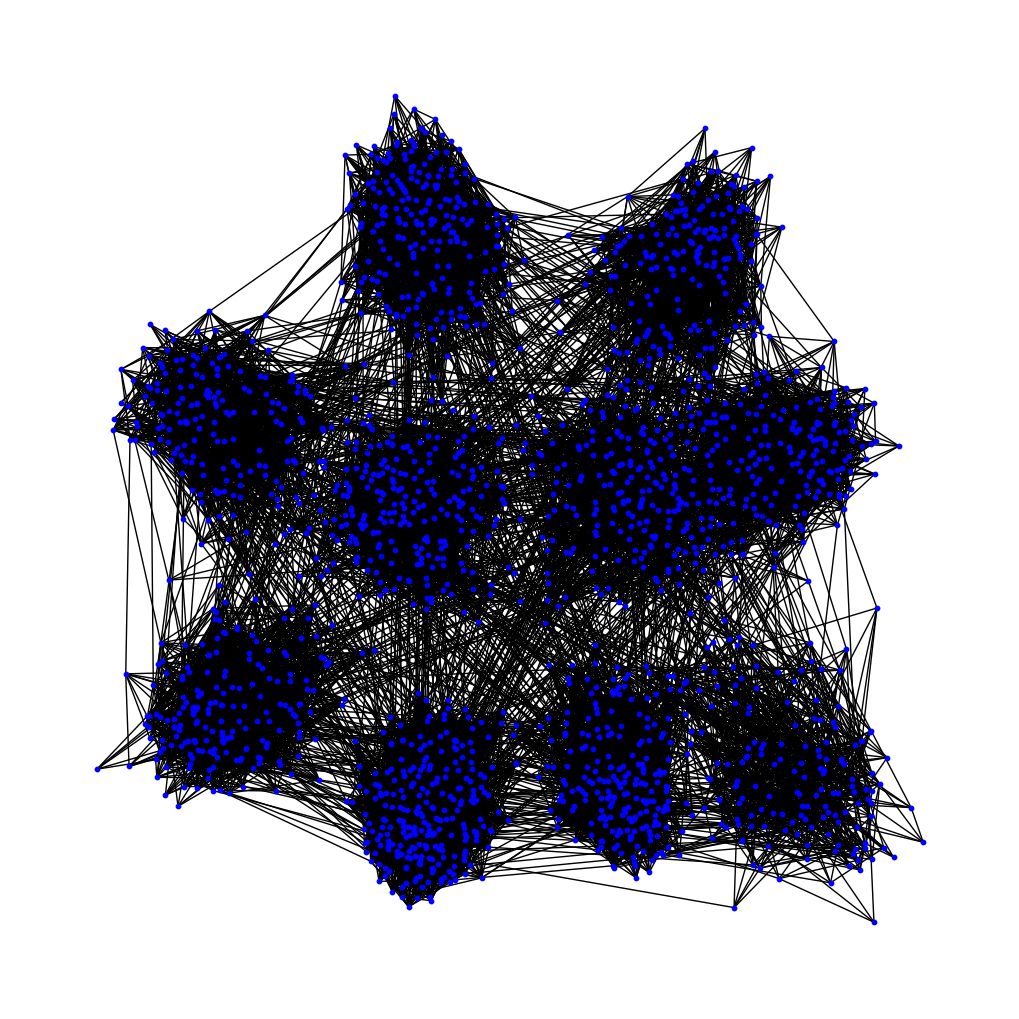

2001 16264


In [8]:
#G, cluster_sizes, ground_truth = create_seperated_component(10)

def create_inter_cluster_edges_for_two_clusters(cluster_A_index, cluster_B_index, edge_probability, cluster_sizes, G):
    cluster_A_size = cluster_sizes[cluster_A_index]
    cluster_B_size = cluster_sizes[cluster_B_index]

    pairs = []
    A = [capital_letters[cluster_A_index]+ str(i) for i in range(cluster_A_size)]
    B = [capital_letters[cluster_B_index]+ str(i) for i in range(cluster_B_size)]


    # Generate all possible pairs using itertools.product
    all_possible_pairs = list(itertools.product(A, B))

    # Decide whether each pair exists based on the probability k
    for pair in all_possible_pairs:
        if random.random() < edge_probability:
            pairs.append(pair)
    
    #print(f"appended {len(pairs)} edges possible {len(all_possible_pairs)}")

    # Print the pairs that exist
#     print(pairs)
    G.add_edges_from(pairs)
    return G

def create_inter_cluster_edges_for_whole_graph(inter_cluster_edge_densite, cluster_sizes, G):
    for first_cluster in range(len(cluster_sizes)):
        for second_cluster in range(first_cluster):
            if first_cluster in [4, 5, 6] and second_cluster in [4, 5, 6]:
                edge_probability = inter_cluster_edge_densite['three_sparse']
            
            elif first_cluster in [7, 8, 9] and second_cluster in [7, 8, 9]:
                edge_probability = inter_cluster_edge_densite['three_dense']
                
            else:
                edge_probability = inter_cluster_edge_densite['rest']
                
            G = create_inter_cluster_edges_for_two_clusters(first_cluster, second_cluster, edge_probability, cluster_sizes, G)
    return G


inter_cluster_edge_densite = {'three_sparse': 0.0009, 'three_dense': 0.0010, 'rest': 0.0005 }
create_inter_cluster_edges_for_whole_graph(inter_cluster_edge_densite, cluster_sizes, G)

mapping = {}
for index, node in enumerate(G.nodes()):
    mapping[node] = index
G = nx.relabel_nodes(G, mapping)

show_graph(G)

print(len(G.nodes()), len(G.edges()))

In [9]:
print(len(G.nodes()))
print(len(G.edges()))

2001
16264


<h1>Here we add the traditional community detection methods </h1>
    <p> These are: </p>
 <ol>
     <li> Louvain </li>
     <li> Leiden </li>
    <li> Infomap </li>
    <li> K-core </li>
    </ol>

In [10]:
from cdlib import algorithms
import igraph as ig
import leidenalg as la

def detect_communities(G, mode):
    assert mode in ['louvain', 'leiden', 'infomap', 'k-core', 'best', 'infomap']
    
    if mode == 'best':
        part = community.best_partition(G)
        values = [part.get(node) for node in G.nodes()] #Dict of node:community
#         print(values)
#         print(part)
        
    elif mode == 'louvain':
        part = nx.community.louvain_communities(G, seed=seed) #Array of dict for each community
        values = []
        
        for index, dic in enumerate(part):
            for k in range(len(dic)):
                values.append(index)
                    
    elif mode == 'leiden':
        H = ig.Graph.from_networkx(G)
        values = []

        part = la.find_partition(H, la.ModularityVertexPartition)
        
        starting_node = 0
        counter = 0
        
        value_dict = {}
              
        for i in range(len(part)):
              for j in part[i]:
                    value_dict[j] = i
        value_dict = dict(sorted(value_dict.items()))
        
        for _, value in value_dict.items():
            values.append(value)

    elif mode == 'infomap':
        H = ig.Graph.from_networkx(G)
        values = []

        part =  algorithms.infomap(G)
        starting_node = 0
        counter = 0
        part = part.to_node_community_map()  

        for key, value in part.items():
            values.append(value[0])
            
    
    community_mapping = {}
    
    for index, label in enumerate(values):
        if not label in community_mapping:
            community_mapping[label] = [index]
        
        else:
            community_mapping[label].append(index)
            
    return values, community_mapping
        
    
def visualize_clusters(G, clusters):
    plt.figure(1)
    nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = clusters, node_size=30, with_labels=False)
    plt.show()    
    
clusters, community_mapping = detect_communities(G, 'leiden')
# print(clusters)


Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}


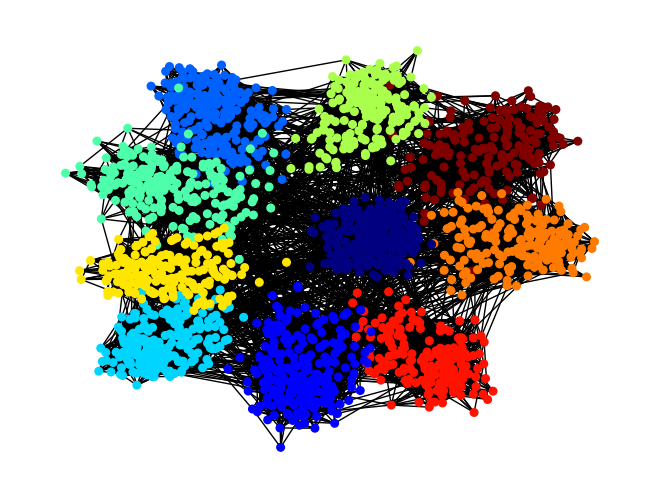

In [11]:
visualize_clusters(G, clusters)


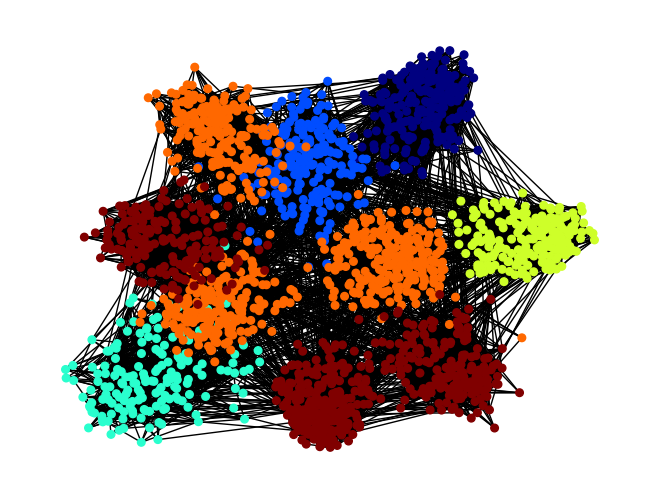

In [12]:
visualize_clusters(G, ground_truth)

In [13]:
def convert(array_mapping):
    modularity_format = {}
    for i in range(len(array_mapping)):
        if not array_mapping[i] in modularity_format:
            modularity_format[array_mapping[i]] = [i]
        else:
            modularity_format[array_mapping[i]].append(i)

    communities = []
    for _, value in modularity_format.items():
        communities.append(value)
    
    return communities


communities = convert(clusters)
# print(len(ground_truth))
# print(len(communities))
#print(ground_truth)
#print(communities)
#print(community_mapping)
#print(centroids_dict)

<h1>Now evaluating intra-cluster and inter-cluster similarities for ground truth</h1>
<p>We take average cosine similarity of within each cluster, and average cosine similarity of nodes belonging to different clusters</p>

In [14]:
def calculate_similarity(vector_1, vector_2):
    return np.dot(vector_1, vector_2)/(np.linalg.norm(vector_1)*np.linalg.norm(vector_2))


def calculate_intra_cluster_similarity(list_of_cluster_indices, attribute_matrix, percentage):
    n = len(list_of_cluster_indices)
    
    if n < 2:
        return 0.0  # Not enough nodes for similarity calculation
    
    cluster_indices_subset = np.random.choice(list_of_cluster_indices, size=int(percentage * n), replace=False)
    
    similarity = []
    
    for node_index1 in cluster_indices_subset:
        for node_index2 in cluster_indices_subset:
            if node_index1 < node_index2:
                similarity.append(calculate_similarity(attribute_matrix[node_index1], attribute_matrix[node_index2]))
    
    if len(similarity) > 0:
        return np.mean(similarity)
    else:
        return 0.0  # Return 0 if no pairs were investigated due to probability


def calculate_inter_cluster_similarity(list_of_cluster_indices1, list_of_cluster_indices2, attribute_matrix, percentage=0.5):
    similarity = []
    
    cluster_indices_subset1 = np.random.choice(list_of_cluster_indices1, size=int(percentage * len(list_of_cluster_indices1)), replace=False)
    cluster_indices_subset2 = np.random.choice(list_of_cluster_indices2, size=int(percentage * len(list_of_cluster_indices2)), replace=False)

    
    for first in cluster_indices_subset1:
        for second in cluster_indices_subset2:
            if random.random() < percentage:
                similarity.append(calculate_similarity(attribute_matrix[first], attribute_matrix[second]))
    
    if len(similarity) > 0:
        return np.mean(similarity)
    else:
        return 0.0  # Return 0 if no pairs were investigated due to probability
            

    return np.mean(similarity)


def calculate_intra_cluster_similarity_wrapper(communities, attribute_matrix, percentage):
    similarities = []
    
    for index, community in enumerate(communities):
        #print(f'intra-cluster similarity for cluster {index} is {calculate_intra_cluster_similarity(community, attributes, percentage)}')
        similarities.append(calculate_intra_cluster_similarity(community, attribute_matrix, percentage))
    #print("\n")
    return np.mean(similarities)

    
    


def calculate_inter_cluster_similarity_wrapper(communities, attribute_matrix, percentage):
    similarities = []
    for index1, community1 in enumerate(communities):
        for index2, community2 in enumerate(communities):
            if index1 == index2:
                break

            #print(f'inter-cluster similarity for clusters {index1} and {index2} is {calculate_inter_cluster_similarity(community1, community2, attributes, percentage)}')
            similarities.append(calculate_inter_cluster_similarity(community1, community2, attribute_matrix, percentage))
    
    return np.mean(similarities)
        
inter = calculate_inter_cluster_similarity_wrapper(communities, attributes, 0.1)
print(f'inter {inter}')

intra = calculate_intra_cluster_similarity_wrapper(communities, attributes, 0.1)
print(f'intra {intra}')



inter 0.022455409622163774
intra 0.9922757045069905


<h1>Save</h1>
<p>Save the results </p>

In [15]:
import pickle
print(nx.adjacency_matrix(G).shape)
print(attributes.shape)
print(len(G.nodes()))

with open('synthetic/attributes.pkl', 'wb') as file:
    pickle.dump(attributes, file)
    
with open('synthetic/adj_matrix.pkl', 'wb') as file:
    pickle.dump(nx.adjacency_matrix(G), file)
    
    
with open('synthetic/ground_truth.pkl', 'wb') as file:
    pickle.dump(ground_truth, file)

    
with open('synthetic/adj_matrix_extended.pkl', 'wb') as file:
    pickle.dump(nx.adjacency_matrix(G).toarray(), file)


(2001, 2001)
(2001, 20)
2001


<h1>Evaluate arbitrary clusterings</h1>
<p>First convert clustering to expected modularity format. Then we evaluate intra-cluster similarity and inter-cluster similarity</p>

In [22]:
from sklearn.metrics import normalized_mutual_info_score

communities = convert(clusters)
mod = nx.community.modularity(G, communities, weight='weight', resolution=1)

#print(f'ground truth modularity {nx.community.modularity(G, communities, weight="weight", resolution=1)}')
print(ground_truth)
print(communities)

mutual_info = normalized_mutual_info_score(clusters, ground_truth)

print(f'Modulairty {mod} Mutual info {mutual_info}')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

2023-10-12 19:38:02.334789: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 19:38:02.591274: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 19:38:02.593104: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 19:38:03.633063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


modularity 0.538608002997274
inter -0.11071192380508786

intra 0.9923573869519927
Modulairty 0.8278045431788428 Mutual info 0.7470624419522519


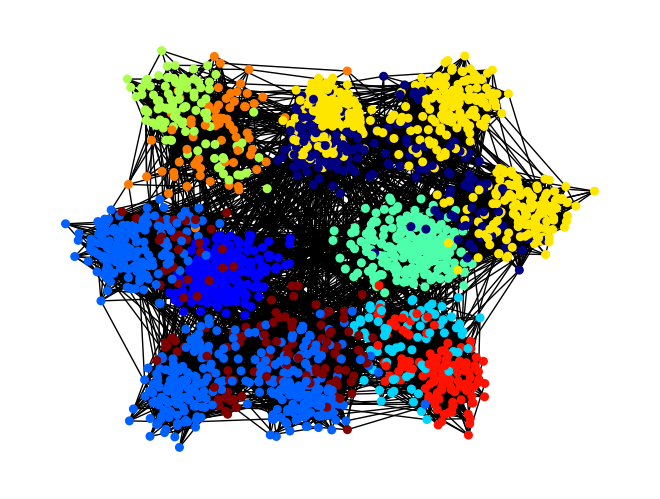

In [17]:
#Working with Xinyu's result
with open('synthetic/xinyu.pkl', 'rb') as file:
    # Load the pickled object
    loaded_object = pickle.load(file)
    
communities = convert(loaded_object.numpy())
print(f'modularity {nx.community.modularity(G, communities, weight="weight", resolution=1)}')

inter = calculate_inter_cluster_similarity_wrapper(communities, attributes, 0.1)
print(f'inter {inter}')

print()
intra = calculate_intra_cluster_similarity_wrapper(communities, attributes, 0.1)
print(f'intra {intra}')
mutual_info = normalized_mutual_info_score(loaded_object.numpy(), ground_truth)

print(f'Modulairty {mod} Mutual info {mutual_info}')
visualize_clusters(G, loaded_object.numpy())


<h1>Evaluating six clusters </h1>
<p> Now let's see what's happen when we run Xinyu's repo with 6 clusters </p>

modularity 0.7138825373709592
inter -0.1976481100155256

intra 0.9924832651865537
Modulairty 0.8278045431788428 Mutual info 0.9978909748860924


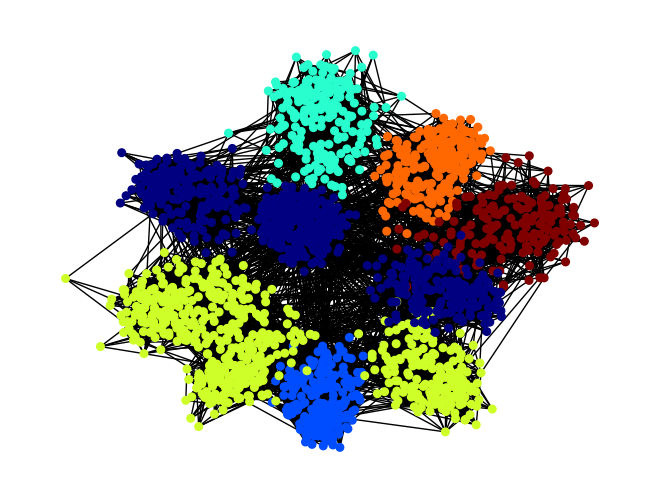

In [18]:
import pickle
#Working with Xinyu's result
with open('synthetic/xinyu_6.pkl', 'rb') as file:
    # Load the pickled object
    loaded_object = pickle.load(file)
    
communities = convert(loaded_object.numpy())
print(f'modularity {nx.community.modularity(G, communities, weight="weight", resolution=1)}')

inter = calculate_inter_cluster_similarity_wrapper(communities, attributes, 0.1)
print(f'inter {inter}')

print()
intra = calculate_intra_cluster_similarity_wrapper(communities, attributes, 0.1)
print(f'intra {intra}')
mutual_info = normalized_mutual_info_score(loaded_object.numpy(), ground_truth)

print(f'Modulairty {mod} Mutual info {mutual_info}')
visualize_clusters(G, loaded_object.numpy())






<h1>An arbitrary network</h1>
Here we will read an arbitrary citation network and will cluster that

In [19]:
with open('hepth/adj_matrix.pkl', 'rb') as file:
    # Load the pickled object
    arb_adj_matrix = pickle.load(file)
    
with open('hepth/cit_hepth_attributes_specter_abstracts_only.pkl', 'rb') as file:
    # Load the pickled object
    arb_attributes = pickle.load(file)
    
G = nx.from_scipy_sparse_array(arb_adj_matrix)
print(arb_attributes.shape)
print(len(G.nodes()))
print(len(G.edges()))

#Working with Xinyu's result
with open('hepth/gcc_cit_hepth_173.pkl', 'rb') as file:
    # Load the pickled object
    loaded_object = pickle.load(file)
    
communities = convert(loaded_object.numpy())
print(f'modularity {nx.community.modularity(G, communities)}')


#visualize_clusters(G, loaded_object.numpy())
#show_graph(G)


inter = calculate_inter_cluster_similarity_wrapper(communities, arb_attributes, 0.1)
print(f'inter {inter}')

print()
intra = calculate_intra_cluster_similarity_wrapper(communities, arb_attributes, 0.1)
print(f'intra {intra}')


(27770, 768)
27770
352324
modularity 0.3709575252226693
inter 0.7022118078640572

intra 0.7743991147845577


<h1>Now traditional clustering </h1>

In [20]:
clusters, community_mapping = detect_communities(G, 'leiden')
communities = convert(clusters)

print(len(communities))
inter = calculate_inter_cluster_similarity_wrapper(communities, arb_attributes, 0.1)
print(f'inter {inter}')

intra = calculate_intra_cluster_similarity_wrapper(communities, arb_attributes, 0.1)
print(f'intra {intra}')

print(f'modularity {nx.community.modularity(G, communities)}')


172
inter 0.01581693234310148
intra 0.10387922095570538
modularity 0.6663190832892051


In [ ]:
clusters, community_mapping = detect_communities(G, 'best')
communities = convert(clusters)

inter = calculate_inter_cluster_similarity_wrapper(communities, arb_attributes, 0.1)
print(f'inter {inter}')

intra = calculate_intra_cluster_similarity_wrapper(communities, arb_attributes, 0.1)
print(f'intra {intra}')

print(f'modularity {nx.community.modularity(G, communities)}')


<table border="1">
  <tr>
    <th>Dataset</th>
    <th>Algorithm</th>
    <th>Inter Cluster Similarity</th>
    <th>Intra Cluster Similarity</th>
    <th>Number of Clusters</th>
    <th>Modularity</th>
    <th>Normalized mutual Info</th>
  </tr>
  <tr>
    <td>Synthetic</td>
    <td>Leiden</td>
    <td>0.022</td>
    <td>0.992</td>
    <td>10</td>
    <td>0.828</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Synthetic</td>
    <td>Xinyu</td>
    <td>-0.111</td>
    <td>0.539</td>
    <td>10</td>
    <td>0.828</td>
    <td>0.7</td>
  </tr>
   <tr>
    <td>Synthetic six clusters</td>
    <td>Xinyu</td>
    <td>-0.198</td>
    <td>0.992</td>
    <td>6</td>
    <td>0.828</td>
    <td>1</td>
  </tr>
    <tr>
    <td>Citation</td>
    <td>Leiden</td>
    <td>0.021</td>
    <td>0.114</td>
    <td>173</td>
    <td>0.662</td>
    <td>-</td>
  </tr>
    <td>Citation</td>
    <td>Xinyu</td>
    <td>0.704</td>
    <td>0.774</td>
    <td>173</td>
    <td>0.371</td>
    <td>-</td>
  </tr>
  <!-- Add more rows as needed -->
</table>